In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
parquet_test_file = r'C:\Users\mateo\Desktop\Datathon-main\proyecto_ML\test.parquet'
df_test = pd.read_parquet(parquet_test_file, engine='auto')

In [3]:
parquet_train_file = r'C:\Users\mateo\Desktop\proyecto2\miProyecto2\proyecto_ML\train.parquet'
df_train = pd.read_parquet(parquet_train_file, engine='auto')

In [4]:
df_test.select_dtypes(include=['object']).columns.tolist()

['url',
 'region',
 'region_url',
 'type',
 'laundry_options',
 'parking_options',
 'image_url',
 'description',
 'state']

EDA

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38498 non-null  int64  
 1   url                      38498 non-null  object 
 2   region                   38498 non-null  object 
 3   region_url               38498 non-null  object 
 4   type                     38498 non-null  object 
 5   sqfeet                   38498 non-null  int64  
 6   beds                     38498 non-null  int64  
 7   baths                    38498 non-null  float64
 8   cats_allowed             38498 non-null  int64  
 9   dogs_allowed             38498 non-null  int64  
 10  smoking_allowed          38498 non-null  int64  
 11  wheelchair_access        38498 non-null  int64  
 12  electric_vehicle_charge  38498 non-null  int64  
 13  comes_furnished          38498 non-null  int64  
 14  laundry_options       

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [6]:
df_test.isna().sum().sort_values(ascending = False)

parking_options            14005
laundry_options             7855
long                         196
lat                          196
id                             0
wheelchair_access              0
description                    0
image_url                      0
comes_furnished                0
electric_vehicle_charge        0
smoking_allowed                0
url                            0
dogs_allowed                   0
cats_allowed                   0
baths                          0
beds                           0
sqfeet                         0
type                           0
region_url                     0
region                         0
state                          0
dtype: int64

In [7]:
df_train.isna().sum().sort_values(ascending = False)

parking_options            126682
laundry_options             71171
long                         1722
lat                          1722
description                     2
id                              0
url                             0
image_url                       0
comes_furnished                 0
electric_vehicle_charge         0
wheelchair_access               0
smoking_allowed                 0
dogs_allowed                    0
cats_allowed                    0
baths                           0
beds                            0
sqfeet                          0
type                            0
price                           0
region_url                      0
region                          0
state                           0
dtype: int64

In [ ]:
df_train['laundry_options'].value_counts() 

In [8]:
df_test['laundry_options'].value_counts() 


w/d in unit           13156
w/d hookups            7627
laundry on site        5924
laundry in bldg        3590
no laundry on site      346
Name: laundry_options, dtype: int64

In [10]:
df_train['parking_options'].value_counts()

off-street parking    115612
attached garage        36428
carport                35048
detached garage        15314
street parking         14370
no parking              2882
valet parking            143
Name: parking_options, dtype: int64

In [6]:
df_test = df_test.fillna({'parking_options':'sin dato',
                        'laundry_options':'sin dato',
                        'long':0.0,
                        'lat':0.0})

In [7]:
df_train = df_train.fillna({'parking_options':'sin dato',
                        'laundry_options':'sin dato',
                        'long':0.0,
                        'lat':0.0})

In [7]:
mask = (df_train['description'].isna()==True)
df_train.loc[mask, :].head(10)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
198741,7038994780,https://savannah.craigslist.org/apa/d/pooler-p...,savannah / hinesville,https://savannah.craigslist.org,905,apartment,1132,2,2.0,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00m0m_9wTPUMJWyt...,None,32.1149,-81.2520,ga
210823,7040721424,https://hudsonvalley.craigslist.org/apa/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,1600,apartment,950,2,1.0,1,...,0,0,0,sin dato,sin dato,https://images.craigslist.org/00j0j_cdesyqAgYg...,None,41.7035,-73.9117,ny


In [8]:
df_train = df_train.fillna({'description':'sin dato'})

In [14]:
df_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,sin dato,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


In [15]:
df_test.tail()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
38493,7041556338,https://mobile.craigslist.org/apa/d/daphne-lux...,mobile,https://mobile.craigslist.org,apartment,1180,2,2.0,1,1,...,1,0,0,w/d in unit,detached garage,https://images.craigslist.org/01616_lCR9AY6Vlb...,At Belforest Villas youâll have all the conv...,30.6197,-87.8895,al
38494,7051072582,https://elpaso.craigslist.org/apa/d/el-paso-th...,el paso,https://elpaso.craigslist.org,apartment,1138,3,2.0,1,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/01010_fEVpb2QLmX...,Ready for the CrossPointe Experience show con...,31.8045,-105.9660,tx
38495,7048966175,https://tampa.craigslist.org/hil/apa/d/brandon...,tampa bay area,https://tampa.craigslist.org,apartment,743,1,1.0,1,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00r0r_b7LZqSM75f...,To schedule a tour We now book our tour appoin...,27.8971,-82.3387,fl
38496,7044693740,https://mohave.craigslist.org/apa/d/fort-mohav...,mohave county,https://mohave.craigslist.org,house,1276,3,2.0,0,0,...,0,0,0,w/d hookups,attached garage,https://images.craigslist.org/00606_21aHFx5Gtq...,"House for Rent (1 year lease - min. ) - 3 Bed,...",35.0052,-114.5690,az
38497,7048475278,https://atlanta.craigslist.org/wat/apa/d/atlan...,atlanta,https://atlanta.craigslist.org,apartment,687,1,1.0,1,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/01515_csv1lpFUDm...,Find Your Way to The Mille Brookhaven Discover...,33.8236,-84.3214,ga


In [9]:
df_train_copy=df_train.copy()
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

Creeo una nueva columna llamada "category_price" con el objetivo de determinar la variable dependiente. Para este caso, "low" será 1 mientras "medium y higt" 0

In [10]:
df_train_copy.loc[df_train_copy['price'] < 1000, 'category_price'] = 1 
df_train_copy.loc[df_train_copy['price'] >= 1000, 'category_price'] = 0
df_train_copy['category_price']=df_train_copy['category_price'].apply(np.int64) #Paso de float a int64

In [11]:
df_train_copy.drop(columns=['price'], axis=1, inplace=True)

In [ ]:
"""                PRUEBAS
#df_train_copy.loc[df_train_copy['price']==1000, :]
#df_train_copy.loc[df_train_copy['price']==999, :]
"""

In [12]:
df_train_copy.drop(columns=['id','long','lat','description','image_url','url','region_url'], axis=1, inplace=True) 

In [13]:
df_train_copy['baths']=df_train_copy['baths'].apply(np.int64)

In [14]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   region                   346479 non-null  object
 1   type                     346479 non-null  object
 2   sqfeet                   346479 non-null  int64 
 3   beds                     346479 non-null  int64 
 4   baths                    346479 non-null  int64 
 5   cats_allowed             346479 non-null  int64 
 6   dogs_allowed             346479 non-null  int64 
 7   smoking_allowed          346479 non-null  int64 
 8   wheelchair_access        346479 non-null  int64 
 9   electric_vehicle_charge  346479 non-null  int64 
 10  comes_furnished          346479 non-null  int64 
 11  laundry_options          346479 non-null  object
 12  parking_options          346479 non-null  object
 13  state                    346479 non-null  object
 14  category_price      

Convierto en datos numericos las columnas en string de las que haré uso

In [15]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [16]:
df_train_copy['region_le'] = le.fit_transform(df_train_copy['region'])
df_train_copy['type_le'] = le.fit_transform(df_train_copy['type'])
df_train_copy['laundry_options_le'] = le.fit_transform(df_train_copy['laundry_options'])
df_train_copy['parking_options_le'] = le.fit_transform(df_train_copy['parking_options'])
df_train_copy['state_le'] = le.fit_transform(df_train_copy['state'])

In [17]:
df_train_copy.drop(columns=['region','type','laundry_options','parking_options','state'], axis=1, inplace=True) 

In [19]:
df_train_copy.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,category_price,region_le,type_le,laundry_options_le,parking_options_le,state_le
0,1200,2,2,1,1,1,0,0,0,0,33,6,5,2,13
1,694,1,1,1,1,1,0,0,0,0,64,0,5,1,5
2,900,2,2,0,0,1,0,0,0,0,236,0,4,4,45
3,1469,3,2,1,1,1,0,0,0,0,269,6,5,5,3
4,700,1,1,1,1,1,0,0,0,1,230,0,5,1,42


In [20]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   sqfeet                   346479 non-null  int64
 1   beds                     346479 non-null  int64
 2   baths                    346479 non-null  int64
 3   cats_allowed             346479 non-null  int64
 4   dogs_allowed             346479 non-null  int64
 5   smoking_allowed          346479 non-null  int64
 6   wheelchair_access        346479 non-null  int64
 7   electric_vehicle_charge  346479 non-null  int64
 8   comes_furnished          346479 non-null  int64
 9   category_price           346479 non-null  int64
 10  region_le                346479 non-null  int32
 11  type_le                  346479 non-null  int32
 12  laundry_options_le       346479 non-null  int32
 13  parking_options_le       346479 non-null  int32
 14  state_le                 346479 non-

In [18]:
df_test_copy=df_test.copy()
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38498 non-null  int64  
 1   url                      38498 non-null  object 
 2   region                   38498 non-null  object 
 3   region_url               38498 non-null  object 
 4   type                     38498 non-null  object 
 5   sqfeet                   38498 non-null  int64  
 6   beds                     38498 non-null  int64  
 7   baths                    38498 non-null  float64
 8   cats_allowed             38498 non-null  int64  
 9   dogs_allowed             38498 non-null  int64  
 10  smoking_allowed          38498 non-null  int64  
 11  wheelchair_access        38498 non-null  int64  
 12  electric_vehicle_charge  38498 non-null  int64  
 13  comes_furnished          38498 non-null  int64  
 14  laundry_options       

In [19]:
df_test_copy.drop(columns=['id','long','lat','description','image_url','url','region_url'], axis=1, inplace=True) 
df_test_copy['baths']=df_test_copy['baths'].apply(np.int64)

Convierto en datos numericos las columnas en string de las que haré uso

In [20]:
df_test_copy['region_le'] = le.fit_transform(df_test_copy['region'])
df_test_copy['type_le'] = le.fit_transform(df_test_copy['type'])
df_test_copy['laundry_options_le'] = le.fit_transform(df_test_copy['laundry_options'])
df_test_copy['parking_options_le'] = le.fit_transform(df_test_copy['parking_options'])
df_test_copy['state_le'] = le.fit_transform(df_test_copy['state'])

In [21]:
df_test_copy.drop(columns=['region','type','laundry_options','parking_options','state'], axis=1, inplace=True) 

In [26]:
df_test_copy.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,region_le,type_le,laundry_options_le,parking_options_le,state_le
0,1344,3,2,0,0,1,0,0,0,9,8,5,4,22
1,1050,2,1,0,0,1,0,0,0,370,0,4,4,46
2,1150,2,2,1,1,1,1,0,0,9,0,5,1,22
3,1280,2,2,1,1,0,0,0,0,112,0,5,0,5
4,783,2,1,1,1,1,0,0,0,53,0,1,5,45


In [27]:
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   sqfeet                   38498 non-null  int64
 1   beds                     38498 non-null  int64
 2   baths                    38498 non-null  int64
 3   cats_allowed             38498 non-null  int64
 4   dogs_allowed             38498 non-null  int64
 5   smoking_allowed          38498 non-null  int64
 6   wheelchair_access        38498 non-null  int64
 7   electric_vehicle_charge  38498 non-null  int64
 8   comes_furnished          38498 non-null  int64
 9   region_le                38498 non-null  int32
 10  type_le                  38498 non-null  int32
 11  laundry_options_le       38498 non-null  int32
 12  parking_options_le       38498 non-null  int32
 13  state_le                 38498 non-null  int32
dtypes: int32(5), int64(9)
memory usage: 3.4 MB


In [63]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   sqfeet                   346479 non-null  int64
 1   beds                     346479 non-null  int64
 2   baths                    346479 non-null  int64
 3   cats_allowed             346479 non-null  int64
 4   dogs_allowed             346479 non-null  int64
 5   smoking_allowed          346479 non-null  int64
 6   wheelchair_access        346479 non-null  int64
 7   electric_vehicle_charge  346479 non-null  int64
 8   comes_furnished          346479 non-null  int64
 9   category_price           346479 non-null  int64
 10  region_le                346479 non-null  int32
 11  type_le                  346479 non-null  int32
 12  laundry_options_le       346479 non-null  int32
 13  parking_options_le       346479 non-null  int32
 14  state_le                 346479 non-

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

Correlaciones: En este apartado me dedicaré al analisis de correlaciones

In [39]:
df_train_copy.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,category_price,region_le,type_le,laundry_options_le,parking_options_le,state_le
0,1200,2,2,1,1,1,0,0,0,0,33,6,5,2,13
1,694,1,1,1,1,1,0,0,0,0,64,0,5,1,5
2,900,2,2,0,0,1,0,0,0,0,236,0,4,4,45
3,1469,3,2,1,1,1,0,0,0,0,269,6,5,5,3
4,700,1,1,1,1,1,0,0,0,1,230,0,5,1,42


In [23]:
df_train_copy_corr = df_train_copy.corr()
df_train_copy_corr

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,category_price,region_le,type_le,laundry_options_le,parking_options_le,state_le
sqfeet,1.000000,0.004030,0.009850,-0.003808,-0.002791,-0.002164,-0.001234,-0.000150,0.001235,-0.005171,-0.001037,0.007094,-0.000111,-0.005222,-0.002543
beds,0.004030,1.000000,0.372336,-0.024088,-0.013665,-0.001809,-0.012290,-0.005221,0.002834,-0.047671,-0.001312,0.105790,0.052342,-0.032468,0.001077
baths,0.009850,0.372336,1.000000,-0.019904,0.016117,-0.014435,0.035208,0.013543,0.046066,-0.227166,0.007512,0.151703,0.274439,-0.124361,-0.034906
cats_allowed,-0.003808,-0.024088,-0.019904,1.000000,0.887352,0.016858,0.122285,0.049270,-0.059488,0.009900,0.025761,-0.106959,0.065870,-0.069148,0.026612
dogs_allowed,-0.002791,-0.013665,0.016117,0.887352,1.000000,0.013732,0.129010,0.049180,-0.038191,0.003936,0.019259,-0.071137,0.117924,-0.083516,0.021539
smoking_allowed,-0.002164,-0.001809,-0.014435,0.016858,0.013732,1.000000,-0.223676,-0.096233,-0.161876,0.124547,-0.011079,-0.065002,-0.095085,0.207034,-0.011103
wheelchair_access,-0.001234,-0.012290,0.035208,0.122285,0.129010,-0.223676,1.000000,0.192750,0.195553,-0.042573,-0.015653,-0.048134,0.103495,-0.114748,0.019539
electric_vehicle_charge,-0.000150,-0.005221,0.013543,0.049270,0.049180,-0.096233,0.192750,1.000000,0.069185,-0.066749,0.010340,0.001356,0.064139,-0.102782,-0.030656
comes_furnished,0.001235,0.002834,0.046066,-0.059488,-0.038191,-0.161876,0.195553,0.069185,1.000000,0.017165,-0.024486,0.040171,0.012709,-0.047456,-0.000674
category_price,-0.005171,-0.047671,-0.227166,0.009900,0.003936,0.124547,-0.042573,-0.066749,0.017165,1.000000,-0.037104,-0.041841,-0.279703,0.190982,0.107240


In [24]:
df_train_copy_corr.describe()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,category_price,region_le,type_le,laundry_options_le,parking_options_le,state_le
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.066532,0.093326,0.100400,0.128034,0.136583,0.045314,0.089302,0.076532,0.070183,0.047053,0.060480,0.064134,0.087386,0.029919,0.077210
std,0.258271,0.270743,0.287677,0.336551,0.333330,0.283759,0.276124,0.265731,0.268248,0.289361,0.261046,0.274500,0.284783,0.291758,0.257694
min,-0.005222,-0.047671,-0.227166,-0.106959,-0.083516,-0.223676,-0.223676,-0.102782,-0.161876,-0.279703,-0.068985,-0.184413,-0.279703,-0.184413,-0.034906
25%,-0.002667,-0.012977,-0.017169,-0.021996,-0.008228,-0.080044,-0.029113,-0.017939,-0.031339,-0.045122,-0.016948,-0.056568,0.004206,-0.108765,-0.006823
50%,-0.001037,-0.001312,0.013543,0.016858,0.016117,-0.011079,0.019539,0.010340,0.002834,-0.005171,-0.001037,0.007094,0.052342,-0.068985,0.011485
75%,0.002633,0.028186,0.098884,0.057570,0.083552,0.015295,0.125647,0.056704,0.043118,0.062203,0.012022,0.072980,0.110709,0.025381,0.024075
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

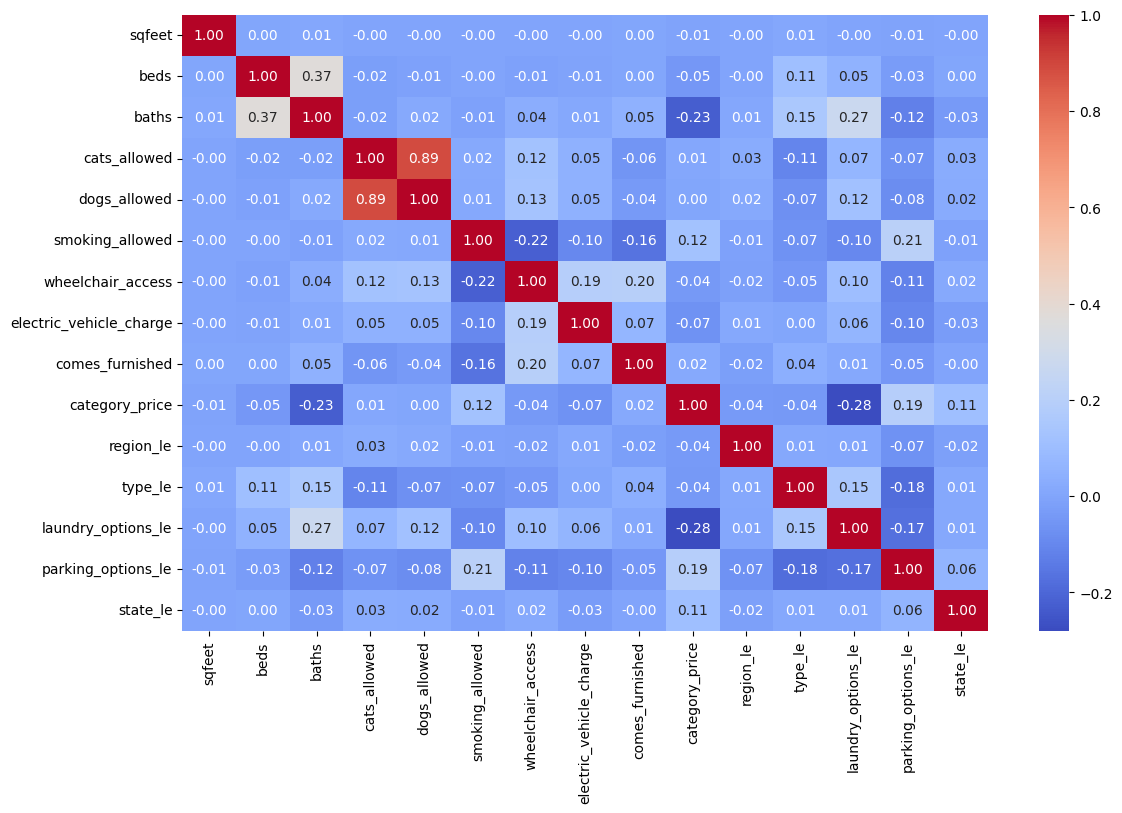

In [25]:
#Graficamos las correlaciones con un mapa de calor
plt.figure(figsize=(13,8))
sns.heatmap(df_train_copy_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm')

Con base en este mapa de calor seleccionaré: 'category_price','state_le','parking_options_le','smoking_allowed','laundry_options','electric_vehicle_charge','baths','beds'


In [26]:
seleccion_train_corr=df_train_copy[['category_price','state_le','parking_options_le','smoking_allowed','laundry_options_le','electric_vehicle_charge','baths','beds']].corr()
seleccion_train_corr

,category_price,state_le,parking_options_le,smoking_allowed,laundry_options_le,electric_vehicle_charge,baths,beds
category_price,1.000000,0.107240,0.190982,0.124547,-0.279703,-0.066749,-0.227166,-0.047671
state_le,0.107240,1.000000,0.055983,-0.011103,0.011485,-0.030656,-0.034906,0.001077
parking_options_le,0.190982,0.055983,1.000000,0.207034,-0.172111,-0.102782,-0.124361,-0.032468
smoking_allowed,0.124547,-0.011103,0.207034,1.000000,-0.095085,-0.096233,-0.014435,-0.001809
laundry_options_le,-0.279703,0.011485,-0.172111,-0.095085,1.000000,0.064139,0.274439,0.052342
electric_vehicle_charge,-0.066749,-0.030656,-0.102782,-0.096233,0.064139,1.000000,0.013543,-0.005221
baths,-0.227166,-0.034906,-0.124361,-0.014435,0.274439,0.013543,1.000000,0.372336
beds,-0.047671,0.001077,-0.032468,-0.001809,0.052342,-0.005221,0.372336,1.000000


<AxesSubplot: >

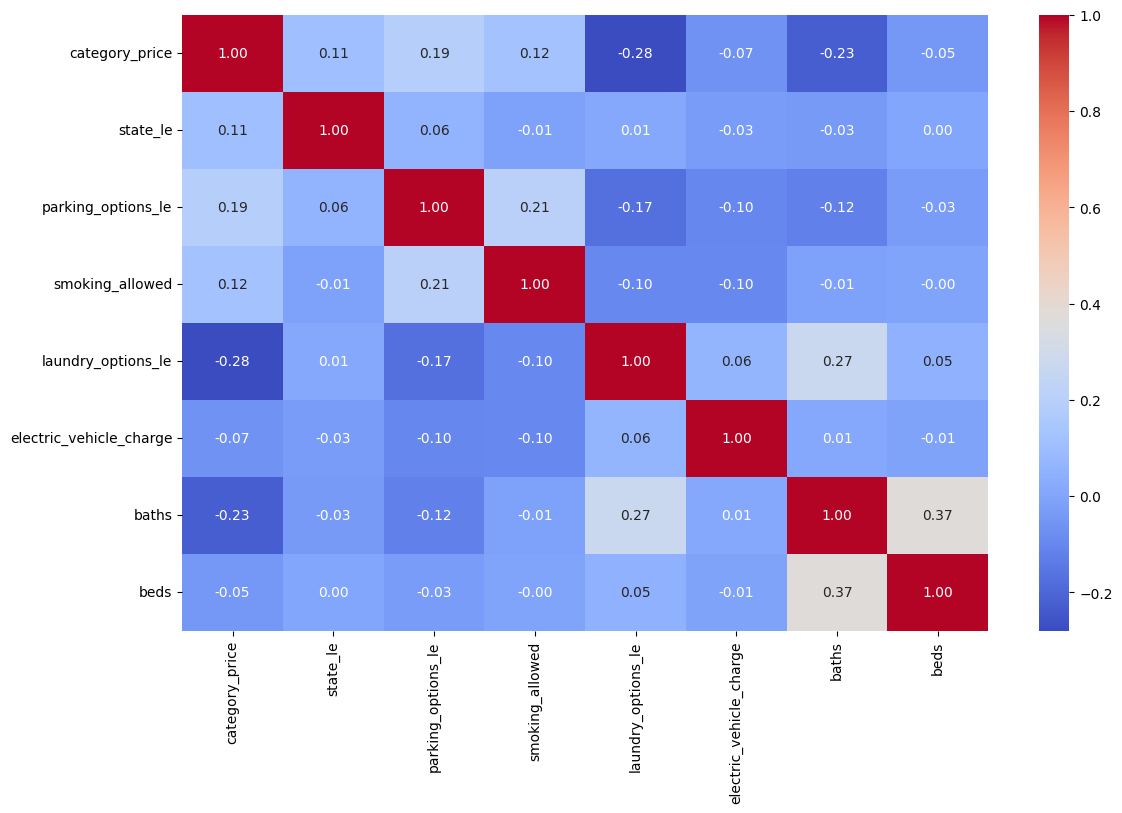

In [27]:
plt.figure(figsize=(13,8))
sns.heatmap(seleccion_train_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm')

Modelo entrenado solo con correlaciones negativas

In [45]:
df_train_copy.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,category_price,region_le,type_le,laundry_options_le,parking_options_le,state_le
0,1200,2,2,1,1,1,0,0,0,0,33,6,5,2,13
1,694,1,1,1,1,1,0,0,0,0,64,0,5,1,5
2,900,2,2,0,0,1,0,0,0,0,236,0,4,4,45
3,1469,3,2,1,1,1,0,0,0,0,269,6,5,5,3
4,700,1,1,1,1,1,0,0,0,1,230,0,5,1,42


In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [119]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   sqfeet                   346479 non-null  int64
 1   beds                     346479 non-null  int64
 2   baths                    346479 non-null  int64
 3   cats_allowed             346479 non-null  int64
 4   dogs_allowed             346479 non-null  int64
 5   smoking_allowed          346479 non-null  int64
 6   wheelchair_access        346479 non-null  int64
 7   electric_vehicle_charge  346479 non-null  int64
 8   comes_furnished          346479 non-null  int64
 9   category_price           346479 non-null  int64
 10  region_le                346479 non-null  int32
 11  type_le                  346479 non-null  int32
 12  laundry_options_le       346479 non-null  int32
 13  parking_options_le       346479 non-null  int32
 14  state_le                 346479 non-

In [131]:
"""
X_train = df_train_copy[['laundry_options_le','electric_vehicle_charge','baths','beds']]
X_test = df_test_copy[['laundry_options_le','electric_vehicle_charge','baths','beds']]
y_train = df_train_copy[['category_price']]
"""

In [29]:
X = df_train_copy[['laundry_options_le','electric_vehicle_charge','baths','beds']]
y = df_train_copy[['category_price']]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Entreno el modelo

In [33]:
lr.fit(X_train, y_train)

C:\Users\mateo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   sqfeet                   38498 non-null  int64
 1   beds                     38498 non-null  int64
 2   baths                    38498 non-null  int64
 3   cats_allowed             38498 non-null  int64
 4   dogs_allowed             38498 non-null  int64
 5   smoking_allowed          38498 non-null  int64
 6   wheelchair_access        38498 non-null  int64
 7   electric_vehicle_charge  38498 non-null  int64
 8   comes_furnished          38498 non-null  int64
 9   region_le                38498 non-null  int32
 10  type_le                  38498 non-null  int32
 11  laundry_options_le       38498 non-null  int32
 12  parking_options_le       38498 non-null  int32
 13  state_le                 38498 non-null  int32
dtypes: int32(5), int64(9)
memory usage: 3.4 MB


In [35]:
y_pred = lr.predict(X_test)

Uso de las metricas mencionadas en el proyecto

In [36]:
#Calculo el Recall y Accuracy del modelo.
accuracy_train = accuracy_score(y_test, y_pred)
print(f'Accuracy Train: {accuracy_train}')
recall_train = recall_score(y_test, y_pred)
print(f'Recall Train: {recall_train}')

Accuracy Train: 0.6367683560378665
Recall Train: 0.5084149828887534


Entreno con correlaciones positivas y negativas

In [37]:
X = df_train_copy[['laundry_options_le','electric_vehicle_charge','baths','beds','state_le','parking_options_le','smoking_allowed']]
y = df_train_copy[['category_price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [38]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\mateo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
accuracy_train = accuracy_score(y_test, y_pred)
print(f'Accuracy Train: {accuracy_train}')
recall_train = recall_score(y_test, y_pred)
print(f'Recall Train: {recall_train}')

Accuracy Train: 0.6572673747402448
Recall Train: 0.6081915209476036


ROC

In [40]:
roc_auc=roc_auc_score(y_test,y_pred)
roc_auc

0.6537787320954053

In [41]:
print(confusion_matrix(y_test, y_pred))

[[52172 22427]
 [25073 38920]]


EXPORTO EL ARCHIVO COMO CSV

In [42]:
pd.DataFrame(y_pred).to_csv("test_predictions.csv", index=False)

EXTRA (Manejo Outliyers)

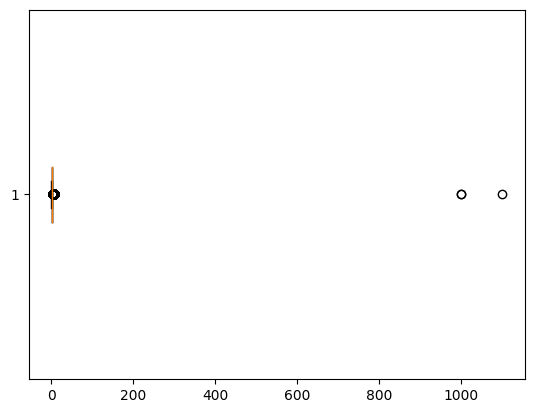

In [43]:
plt.boxplot(df_train_copy['beds'], vert = False)
plt.show()

In [ ]:
#df_test_copy.loc[df_test_copy['beds']>=1000, :]
df_train_copy.loc[df_train_copy['beds']>=1000] = df_train_copy['beds'].median()

In [ ]:
plt.boxplot(df_test_copy['beds'], vert = False)
plt.show()

In [ ]:
df_test_copy.loc[df_train_copy['beds']>=1000] = df_train_copy['beds'].median()